#### Notebook config

In [1]:
import arrau
from arrau import *
import numpy as np

# Introduction

The `arrau` package focuses on 1-3d arrays which in most physical sciences are represented by:
- 1d: time-series (e.g. seismic traces), depth profiles
- 2d: topography, bathymetry, model interfaces, slices through volumes, shot-line gathers
- 3d: models of Earth or other elastic media, seismic data cubes

It is **not** a complex multi-dimensional array manipulation package such as  [`xarray`](http://xarray.pydata.org/en/stable/index.html) which may have overwhelmingly many features for typical seismic applications.

# Getting started

## Testing installation

In [5]:
# !python3 -m unittest --help 
# !python3 -m unittest arrau.test.test_a1d -v
# !python3 -m unittest arrau.test.test_generic -v
# !python3 -m unittest discover arrau --pattern slow_test_*.py
!python3 -m unittest discover arrau

.......................
----------------------------------------------------------------------
Ran 23 tests in 0.014s

OK


In [6]:
!python3 -m unittest arrau.test.test_a1d -v

test_extent_custom (arrau.test.test_a1d.TestArr1d) ... ok
test_extent_default (arrau.test.test_a1d.TestArr1d) ... ok
test_info (arrau.test.test_a1d.TestArr1d) ... ok
test_init_axes (arrau.test.test_a1d.TestArr1d) ... ok
test_plot (arrau.test.test_a1d.TestArr1d) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.002s

OK


   # Adding metadata

## Basic usage

In [23]:
a = Arr1d(np.random.rand(10), extent=[[-1,1]])

In [24]:
a.axes

In [25]:
a.axes[0].extent

[-1, 1]

In [27]:
# a.info() # FIXME: extent, dx

## Getting help

In [3]:
# help(arrau)

In [19]:
help(arrau.a1d)

Help on module arrau.a1d in arrau:

NAME
    arrau.a1d

CLASSES
    arrau.generic.Arr(abc.ABC)
        Arr1d(arrau.generic.Arr, Arr1dPlotter)
            TimeSeries
    builtins.object
        Arr1dPlotter
            Arr1d(arrau.generic.Arr, Arr1dPlotter)
                TimeSeries
    
    class Arr1d(arrau.generic.Arr, Arr1dPlotter)
     |  Abstract 1-3d array.
     |  
     |  Method resolution order:
     |      Arr1d
     |      arrau.generic.Arr
     |      abc.ABC
     |      Arr1dPlotter
     |      builtins.object
     |  
     |  Data and other attributes defined here:
     |  
     |  __abstractmethods__ = frozenset()
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from arrau.generic.Arr:
     |  
     |  __init__(self, array, **kwargs)
     |      Parameters
     |      ----------
     |      array : arrauay
     |          1d, 2d or 3d.
     |      axes : list
     |          List of ArrAxis elements.
     

In [22]:
help(arrau.Arr)

Help on class Arr in module arrau.generic:

class Arr(abc.ABC)
 |  Abstract 1-3d array.
 |  
 |  Method resolution order:
 |      Arr
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, array, **kwargs)
 |      Parameters
 |      ----------
 |      array : arrauay
 |          1d, 2d or 3d.
 |      axes : list
 |          List of ArrAxis elements.
 |      extent : list
 |          List of pairs [vmin, vmax], by default None.
 |  
 |  extract(self, extent)
 |      Extract a subarray from the array.
 |      
 |      Parameters
 |      ----------
 |      extent : list
 |          [[x1, x2], ...] in metres.
 |  
 |  info(self)
 |      Print some useful info about the erray.
 |  
 |  read(self, overwrite=True, **kwargs)
 |      Notes
 |      -----
 |      Overwrite=True by default because otherwise plots are not 
 |      updated even though they are supposed to. 
 |      They will be correct (updated) only
 |      if you delete self.array variable, 

# Features overview

## Plotting

Plotting is essential as it provides an easy way of checking the correctness of the remainder of implemented features.
Plotting capabilities of `arrau` are outsourced to the [`plotea`](https://github.com/kmch/plotea) package through a thin `arrau.api.plot` interface. See [`plotea`](https://github.com/kmch/plotea) for the examples-gallery.

### 1d arrays

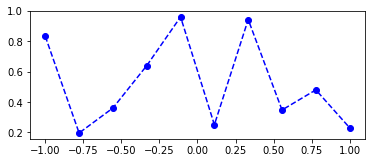

In [10]:
a = Arr1d(np.random.rand(10), extent=[[-1,1]])
a.plot(color='b', linestyle='--', marker='o')

### 2d arrays

In [8]:
# data 
fname = 'downloaded/bt_kol01_shape341x361.mmp'
a = np.memmap(fname, dtype=np.float32, shape=(341,361))
a = Surf(a, extent=[[8e3,25e3],[-3e3,15e3]])

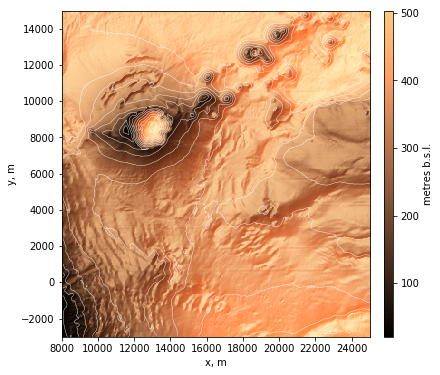

In [8]:
# plot 
figure(10,6)
a.plot(mode='shade', cmap='copper', alpha=1, label='metres b.s.l.')
a.plot(mode='cr', colors='w')

## Slicing

### 2d arrays

In [4]:
a = np.memmap('downloaded/marmousi2_vp_1361x281.mmp', dtype=np.float32, shape=(1361,281))
a = Arr2d(a)

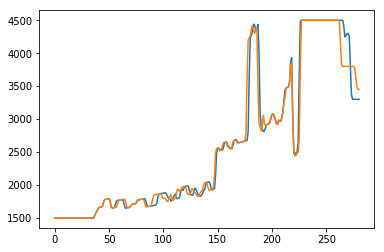

In [16]:
a.slice(10).plot()
a.slice(100).plot()

### 3d arrays

In [4]:
# data 
fname = 'downloaded/p14-StartVp_shape341x361x81.mmp'
a = np.memmap(fname, dtype=np.float32, shape=(341,361,81))
a = Arr3d(a, extent=[[8e3,25e3],[-3e3,15e3],[0,4e3]])
# a.slice(13.25e3, axis=0, unit='m')
# a.slice(8.75e3, axis=1, unit='m')
# a.slice(2e3, axis=2, unit='m')
# i = 0
# a.slices.list[i].plot()

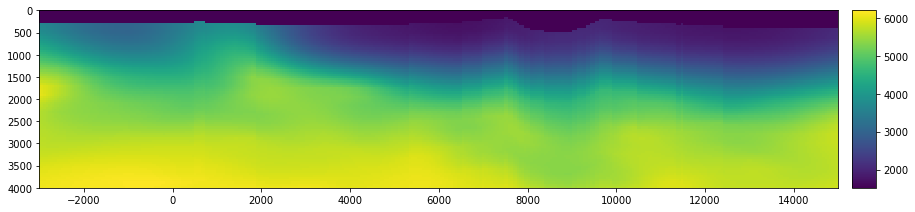

In [6]:
# plot 
figure(15,6)
i = 0
a.slice(13.25e3, axis=0, unit='m')
a.slices.list[i].plot()
# a.slices.list[i].plot(mode='shade', cmap='magma')
# a.slices.list[i].plot(mode='contourf')
# a.slices.list[i].plot(mode='contour', colors='k')

# a.slices.list[i].plot(mode='im+cr', levels=4)
# a.slices.list[i].plot_slice_lines()
plt.show()

## Extracting

## Processing

# ...